In [1]:
library(tidyverse)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
data = read_csv("drerio_vs_xtropicalis_cell_type_enhanced_orthologs.csv")

Rows: 251 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species_2_peptide_id, species_1_peptide_id, orthology_type
dbl (6): e_value, bit score, cosine, dot, corr, mand

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
counts = data %>% group_by(orthology_type) %>% count() %>% 
ungroup() %>% 
mutate(percentage = round(100*(n / sum(n)), 2)) %>% 
merge(data, by = 'orthology_type')


In [4]:
options(repr.plot.height = 3, repr.plot.width= 4)

In [5]:
pal_nejm()(4)

[1] "#BC3C29FF" "#0072B5FF" "#E18727FF" "#20854EFF"

In [6]:
species_1 = 'drerio'
species_2 = 'xtropicalis'

In [7]:
fig_density = counts %>% ggplot(aes(x = `bit score`)) + 
geom_density(aes(fill = orthology_type), alpha = 0.4)  + scale_fill_nejm() +
common_0x +
geom_label(aes(x = 50, y = 0.04,
               label = paste0('M2M: ', counts %>% filter(orthology_type == 'M2M') %>% pull(n) %>% unique(), " (", counts %>% filter(orthology_type == 'M2M') %>% pull(percentage) %>% unique(), "%)"),
              hjust = 0), color = '#BC3C29FF') +
geom_label(aes(x = 50, y = 0.035, 
               label = paste0('M2O: ', counts %>% filter(orthology_type == 'M2O') %>% pull(n) %>% unique(), " (", counts %>% filter(orthology_type == 'M2O') %>% pull(percentage) %>% unique(), "%)"),
              hjust = 0), color = '#0072B5FF') +
geom_label(aes(x = 50, y = 0.03, 
               label = paste0('O2M: ', counts %>% filter(orthology_type == 'O2M') %>% pull(n) %>% unique(), " (", counts %>% filter(orthology_type == 'O2M') %>% pull(percentage) %>% unique(), "%)"),
              hjust = 0), color = '#E18727FF') +
geom_label(aes(x = 50, y = 0.025, 
               label = paste0('O2O: ', counts %>% filter(orthology_type == 'O2O') %>% pull(n) %>% unique(), " (", counts %>% filter(orthology_type == 'O2O') %>% pull(percentage) %>% unique(), "%)"),
              hjust = 0), color = '#20854EFF')  +
    labs(title = paste0(species_1, " vs ", species_2))  +
    scale_y_continuous(limits = c(0, 0.05), breaks = c(0, 0.01, 0.02, 0.03, 0.04, 0.05))


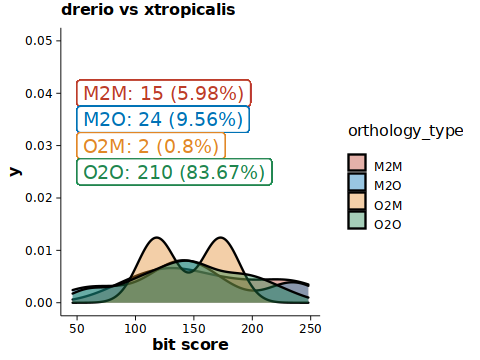

In [8]:
fig_density

In [9]:
ggsave(plot = fig_density, filename = paste0(species_1, "_vs_", species_2, "_enhanced_bit_score_ortho_type_density.pdf"), height = 3, width = 3.75)
ggsave(plot = fig_density + theme(legend.position  = 'none'), filename = paste0(species_1, "_vs_", species_2, "_enhanced_bit_score_ortho_type_density.png"), height = 2.5, width = 2.5)

saveRDS(fig_density, file = paste0(species_1, "_vs_", species_2, "_enhanced_bit_score_ortho_type_density.rds"))

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”


In [2]:
type_pal = c("M2M" = '#BC3C29FF', "M2O" = "#0072B5FF", "O2M" = "#E18727FF", "O2O" = "#20854EFF")

In [5]:
fig_list = list()

all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

    data = read_csv(paste0("enhanced_bit_score_cosine_sim_density/", species_1, "_vs_", species_2, "_cell_type_enhanced_orthologs.csv"))

    counts = data %>% group_by(orthology_type) %>% count() %>% 
ungroup() %>% 
mutate(percentage = round(100*(n / sum(n)), 2)) %>% 
merge(data, by = 'orthology_type')

    m2m_n = counts %>% filter(orthology_type == 'M2M') %>% pull(n) %>% unique()
m2m_p = counts %>% filter(orthology_type == 'M2M') %>% pull(percentage) %>% unique()

    m2o_n = counts %>% filter(orthology_type == 'M2O') %>% pull(n) %>% unique()
m2o_p = counts %>% filter(orthology_type == 'M2O') %>% pull(percentage) %>% unique()

    o2m_n = counts %>% filter(orthology_type == 'O2M') %>% pull(n) %>% unique()
o2m_p = counts %>% filter(orthology_type == 'O2M') %>% pull(percentage) %>% unique()

    o2o_n = counts %>% filter(orthology_type == 'O2O') %>% pull(n) %>% unique()
o2o_p = counts %>% filter(orthology_type == 'O2O') %>% pull(percentage) %>% unique()
    
    
            fig_density = counts %>% ggplot(aes(x = `bit score`)) + 
geom_density(aes(fill = orthology_type), alpha = 0.4)  + scale_fill_manual(values = type_pal) +
common_0x +
geom_label(aes(x = 50, y = 0.045,
               label = paste0('M2M: ', m2m_n, " (", m2m_p, "%)"),
              hjust = 0), color = '#BC3C29FF', size = 3) +
geom_label(aes(x = 50, y = 0.038, 
               label = paste0('M2O: ', m2o_n, " (", m2o_p, "%)"),
              hjust = 0), color = '#0072B5FF', size = 3) +
geom_label(aes(x = 50, y = 0.031, 
               label = paste0('O2M: ', o2m_n, " (", o2m_p, "%)"),
              hjust = 0), color = '#E18727FF', size = 3) +
geom_label(aes(x = 50, y = 0.024, 
               label = paste0('O2O: ', o2o_n, " (", o2o_p, "%)"),
              hjust = 0), color = '#20854EFF', size = 3)  +
    labs(title = paste0(species_1, " vs ", species_2)) +
    scale_y_continuous(limits = c(0, 0.055), breaks = c(0, 0.01, 0.02, 0.03, 0.04, 0.05))

    ggsave(plot = fig_density, filename = paste0("enhanced_orthotype_density/", species_1, "_vs_", species_2, "_bit_score_ortho_type_density.pdf"), height = 3, width = 3.75)
    ggsave(plot = fig_density + theme(legend.position  = 'none'), filename = paste0("enhanced_orthotype_density/", species_1, "_vs_", species_2, "_bit_score_ortho_type_density.png"), height = 2.5, width = 2.5)

    saveRDS(fig_density, file = paste0("enhanced_orthotype_density/", species_1, "_vs_", species_2, "_bit_score_ortho_type_density.rds"))
            fig_list[[i]] = fig_density

            }

Rows: 548 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species_2_peptide_id, species_1_peptide_id, orthology_type
dbl (6): e_value, bit score, cosine, dot, corr, mand

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
Rows: 548 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): species_2_peptide_id, species_1_peptide_id, orthology_type
dbl (6): e_value, bit score, cosine, dot, corr, mand

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
Rows: 593 Columns: 9
── Column specifica

In [7]:
library(png)
library(grid)
library(gridExtra)

In [8]:
plot1 <- readPNG('enhanced_orthotype_density/ptroglodytes_vs_hsapiens_bit_score_ortho_type_density.png')
plot2 <- readPNG('enhanced_orthotype_density/ggorilla_vs_hsapiens_bit_score_ortho_type_density.png')
plot3 <- readPNG('enhanced_orthotype_density/mmulatta_vs_hsapiens_bit_score_ortho_type_density.png')
plot4 <- readPNG('enhanced_orthotype_density/cjacchus_vs_hsapiens_bit_score_ortho_type_density.png')

tmp <- arrangeGrob(rasterGrob(plot1),rasterGrob(plot2),rasterGrob(plot3),rasterGrob(plot4), ncol=4)

In [10]:
ggsave('sp_vs_hsapiens_bit_score_ortho_type_density_enhanced.png',tmp,width=10,height=2.5)

In [11]:
plot1 <- readPNG('enhanced_orthotype_density/ggorilla_vs_ptroglodytes_bit_score_ortho_type_density.png')
plot2 <- readPNG('enhanced_orthotype_density/mmulatta_vs_ptroglodytes_bit_score_ortho_type_density.png')
plot3 <- readPNG('enhanced_orthotype_density/cjacchus_vs_ptroglodytes_bit_score_ortho_type_density.png')

tmp <- arrangeGrob(rasterGrob(plot1),rasterGrob(plot2),rasterGrob(plot3), ncol=3)

In [12]:
ggsave('sp_vs_ptroglodytes_bit_score_ortho_type_density_enhanced.png',tmp,width=7.5,height=2.5)

In [13]:
plot1 <- readPNG('enhanced_orthotype_density/mmulatta_vs_ggorilla_bit_score_ortho_type_density.png')
plot2 <- readPNG('enhanced_orthotype_density/cjacchus_vs_ggorilla_bit_score_ortho_type_density.png')

tmp <- arrangeGrob(rasterGrob(plot1),rasterGrob(plot2), ncol=2)

In [14]:
ggsave('sp_vs_ggorilla_bit_score_ortho_type_density_enhanced.png',tmp,width=5,height=2.5)